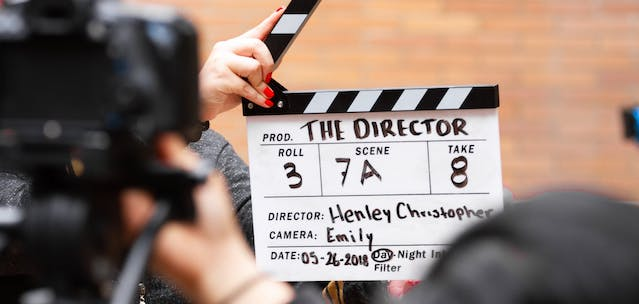

## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Overview

This project uses exploratory data analysis (EDA) to provide tangible, data-driven insights to Microsoft
in their creation of a new movie studio. By analyzing the films that have been most successful at the box 
office, three recommendations are provided on the type of content to create.

## Business Understanding

Complete

## Data Understanding

This analysis uses data compiled from IMDb and box office ratings. The IMDb dataset contains information on 
runtime, genre, average rating, and number of ratings, among other basic information.

The box office datset contains information on domestic and foreign gross revenues for the film, among other 
basic information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [2]:
conn = sqlite3.Connection("zippedData/im.db")

In [3]:
q0 = """
SELECT name FROM sqlite_master WHERE type='table'
"""

pd.read_sql(q0, conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [4]:
q1 = """
SELECT *
FROM movie_ratings
"""

pd.read_sql(q1, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [5]:
movie_basics = """
SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
"""

pd.read_sql(movie_basics, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [6]:
imdb_df = pd.read_sql(movie_basics, conn)

In [7]:
imdb_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [8]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [9]:
imdb_df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [10]:
bom_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [11]:
# Why drop missing values vs replace them?

bom_df.dropna(subset=['domestic_gross', 'foreign_gross'], inplace=True)
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [12]:
bom_df['foreign_gross'] = bom_df['foreign_gross'].str.replace(',', '')
bom_df['foreign_gross'] = bom_df['foreign_gross'].astype('float')
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2009 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   foreign_gross   2009 non-null   float64
 4   year            2009 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.2+ KB


In [13]:
bom_df['total_gross'] = bom_df['domestic_gross'] + bom_df['foreign_gross']
bom_df.rename(columns={'title': 'primary_title'}, inplace=True)
bom_df

,primary_title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05
3309,Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,9.840000e+04


In [14]:
gross_vs_rating = imdb_df[['primary_title', 'averagerating']].merge\
(bom_df[['primary_title', 'total_gross']], on='primary_title', how='inner')

gross_vs_rating

,primary_title,averagerating,total_gross
0,On the Road,6.1,8744000.0
1,On the Road,6.0,8744000.0
2,On the Road,5.7,8744000.0
3,The Secret Life of Walter Mitty,7.3,188100000.0
4,A Walk Among the Tombstones,6.5,53200000.0
...,...,...,...
1805,Detective Chinatown 2,6.1,544100000.0
1806,Hereditary,7.3,79400000.0
1807,Nobody's Fool,4.6,33500000.0
1808,How Long Will I Love U,6.5,82847000.0


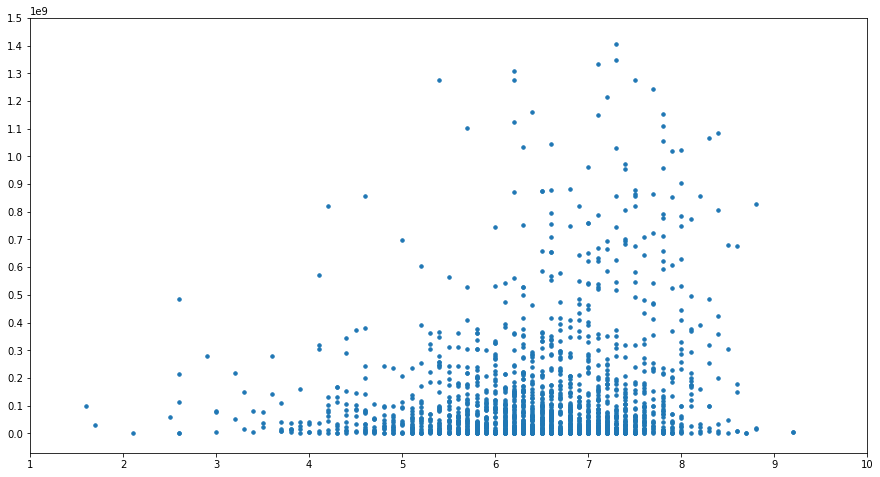

In [15]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(gross_vs_rating['averagerating'], gross_vs_rating['total_gross'], s=12)
ax.set_xticks(list(range(1, 11)))
ax.set_yticks(list(range(0, 1600000000, 100000000)));

## Data Preparation

Complete

In [16]:
# Analysis of runtime vs average rating

runtime_vs_rating_df = imdb_df.copy()

runtime_vs_rating_df = runtime_vs_rating_df[['primary_title', 'runtime_minutes', 'averagerating']]

runtime_vs_rating_df

,primary_title,runtime_minutes,averagerating
0,Sunghursh,175.0,7.0
1,One Day Before the Rainy Season,114.0,7.2
2,The Other Side of the Wind,122.0,6.9
3,Sabse Bada Sukh,NaN,6.1
4,The Wandering Soap Opera,80.0,6.5
...,...,...,...
73851,Diabolik sono io,75.0,6.2
73852,Sokagin Çocuklari,98.0,8.7
73853,Albatross,NaN,8.5
73854,La vida sense la Sara Amat,NaN,6.6


In [17]:
# Remove missing values

runtime_vs_rating_df = runtime_vs_rating_df.dropna()

# Remove large outliers
runtime_vs_rating_df = runtime_vs_rating_df.loc[(runtime_vs_rating_df['runtime_minutes'] >= 40) & (runtime_vs_rating_df['runtime_minutes'] <= 160)]
runtime_vs_rating_df

,primary_title,runtime_minutes,averagerating
1,One Day Before the Rainy Season,114.0,7.2
2,The Other Side of the Wind,122.0,6.9
4,The Wandering Soap Opera,80.0,6.5
6,Joe Finds Grace,83.0,8.1
7,Pál Adrienn,136.0,6.8
...,...,...,...
73849,Padmavyuhathile Abhimanyu,130.0,8.4
73850,Swarm Season,86.0,6.2
73851,Diabolik sono io,75.0,6.2
73852,Sokagin Çocuklari,98.0,8.7


In [18]:
short_movies = runtime_vs_rating_df.loc[runtime_vs_rating_df['runtime_minutes'].between(0, 90, 'right')]
medium_short_movies = runtime_vs_rating_df.loc[runtime_vs_rating_df['runtime_minutes'].between(90, 120, 'right')]
medium_movies = runtime_vs_rating_df.loc[runtime_vs_rating_df['runtime_minutes'].between(120, 150, 'right')]
medium_long_movies = runtime_vs_rating_df.loc[runtime_vs_rating_df['runtime_minutes'].between(150, 180, 'right')]
long_movies = runtime_vs_rating_df.loc[runtime_vs_rating_df['runtime_minutes'].between(180, 240, 'right')]

In [19]:
short_movies_rating = short_movies['averagerating'].mean()
medium_short_movies_rating = medium_short_movies['averagerating'].mean()
medium_movies_rating = medium_movies['averagerating'].mean()
medium_long_movies_rating = medium_long_movies['averagerating'].mean()
long_movies_rating = long_movies['averagerating'].mean()
runtime_bins_ratings = [short_movies_rating, medium_short_movies_rating, medium_movies_rating, \
                       medium_long_movies_rating, long_movies_rating]
runtime_bins_labels = ['0 to 90 Minutes', '90 to 120 Minutes', '120 to 150 Minutes', '150 to 180 Minutes', '180 to 240 Minutes']

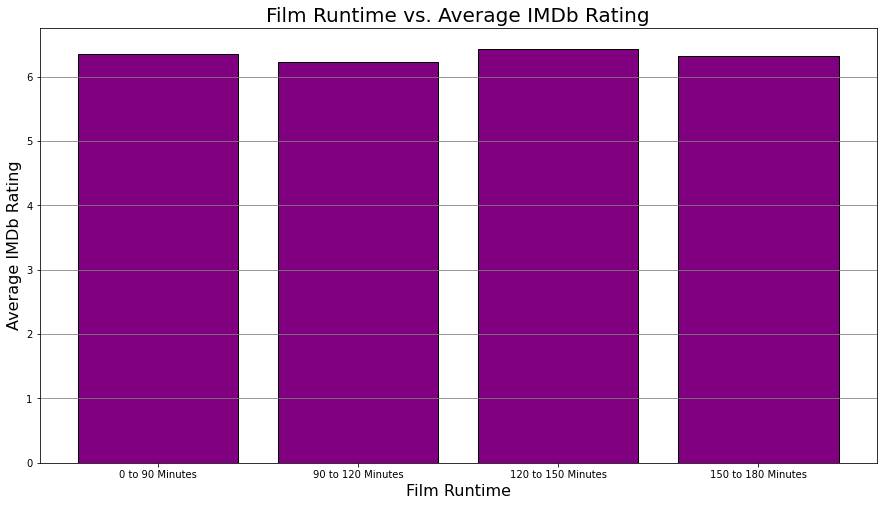

In [20]:
# Create histogram

fig, ax = plt.subplots(figsize=(15, 8))

ax.bar(runtime_bins_labels, runtime_bins_ratings, color='purple', edgecolor='black')
ax.grid(True, axis='y', color='gray')
ax.set_title('Film Runtime vs. Average IMDb Rating', fontsize=20)
ax.set_xlabel('Film Runtime', fontsize=16, color='black')
ax.set_ylabel('Average IMDb Rating', fontsize=16, color='black');

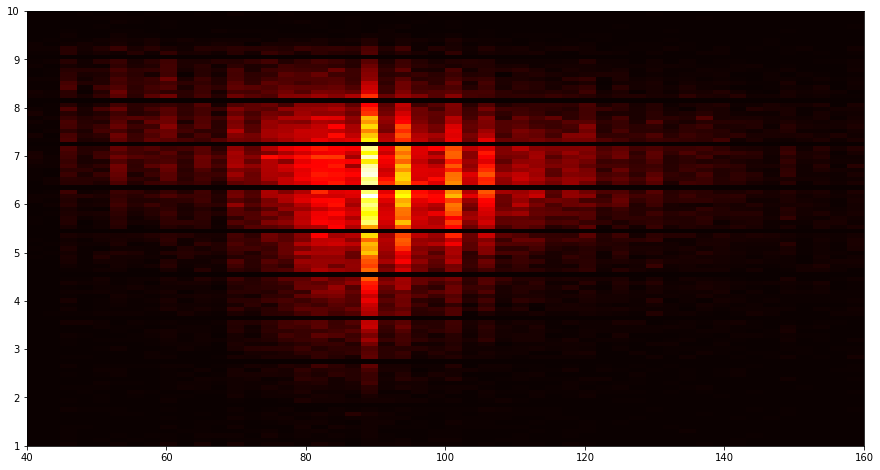

In [21]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.hist2d(runtime_vs_rating_df['runtime_minutes'], runtime_vs_rating_df['averagerating'], bins=[50, 100],
         cmap='hot');

## Data Analysis

Complete